<a href="https://colab.research.google.com/github/catavasia/ML_FIAN2020/blob/master/MLatFIAN2020_seminar02_homework_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Consider the following toy dataset:

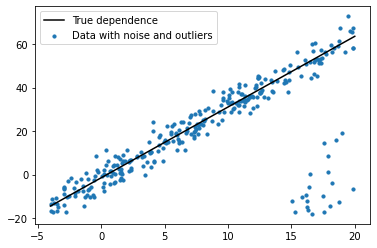

In [ ]:
true_function = lambda x: 3.25 * x - 1.47
noize_function = lambda x: (
    np.random.normal(size=len(x)) * 4. +
    np.where(
        x < 15,
        0.,
        -60 + np.random.normal(size=len(x)) * 10
    ) * (np.random.uniform(size=len(x)) < 0.4).astype(int)
)
limits = (-4., 20.)

def generate_dataset(N=300):
  x = np.random.uniform(*limits, size=N)
  y = true_function(x) + noize_function(x)

  return x[:,None], y

X, y = generate_dataset()

x = np.linspace(*limits, 101)
plt.plot(x, true_function(x), c='black', label='True dependence')
plt.scatter(X, y, s=10, label='Data with noise and outliers')
plt.legend();

## Task 1

Implement a linear model $\hat y(x|w) = w_1\cdot x + w_0$ with MAE loss:
$$\text{MAE}(w) = \frac{1}{N}\sum_{i=1}^N\left|y_i - \hat y(x_i|w)\right|,$$
using gradient descent optimization in `numpy`.

*Hint: introduce a constant feature to account for the bias term to make the formulas simpler.*

Plot the learning curve and the final fit. Also, fit the same data with `sklearn`'s `LinearRegression`, and compare the two fits on the same plot. What do you observe? Write a short comment.

## Gradient Descent


100%|██████████| 1000/1000 [00:00<00:00, 29752.32it/s]

(2,)
(300, 2)
[11.11698805  1.        ]
[ 3.10906229 -1.208     ]


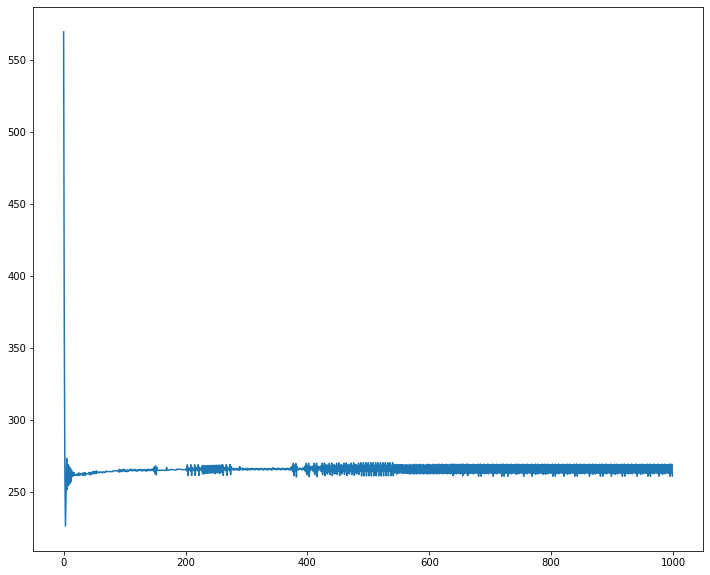

In [ ]:
from tqdm import trange, tqdm

X_expanded = np.concatenate([X, np.ones(shape=(len(X), 1))
], axis=1)
w = np.zeros(dtype=float, shape=X_expanded.shape[1])
print(w.shape)
print(X_expanded.shape)
print(X_expanded[0])

loss_values = []
learning_rate = 0.1

for _ in trange(1000):
  #print(np.sign(y - X_expanded @ w.T))
  gradient = np.sign(y - X_expanded @ w.T) @ (-X_expanded)/ len(X_expanded) # sum
  w -= learning_rate * gradient
  loss_values.append(
      ((X_expanded @ w - y)**2).mean()
  )
print(w)

plt.figure(figsize=(12,10))
plt.plot(loss_values);
plt.show()





(101, 2)
(101, 1)
(2,)


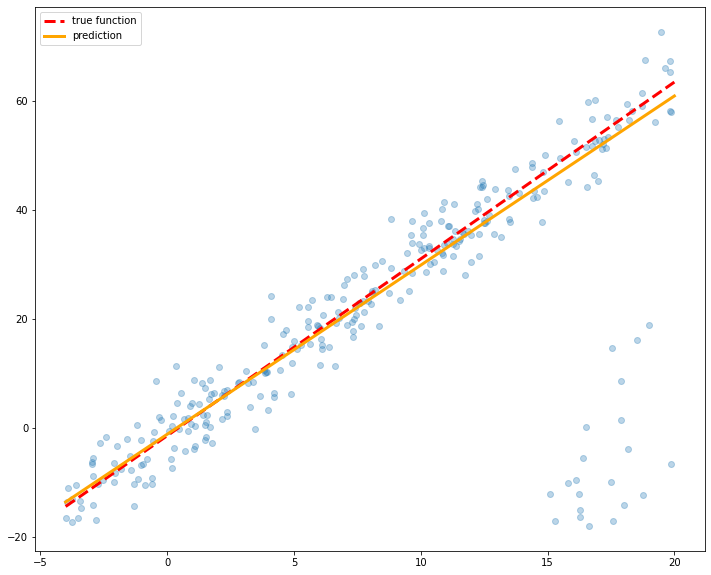

In [ ]:
x = np.linspace(*limits, 101)
x = x[:,None]
x_expanded = np.concatenate([x, np.ones(shape=(len(x), 1))
], axis=1)
print(x_expanded.shape)
print(x.shape)
print(w.shape)

plt.figure(figsize=(12,10))
plt.plot(x, true_function(x), label='true function', color = 'red', linestyle = '--', linewidth = 3)
plt.scatter(X, y, alpha = 0.3);
plt.plot(x,
         x_expanded @ w, label='prediction', color = 'orange', linewidth = 3)
plt.legend();

## Linear Regression


[2.37008055] 1.2782964968080002


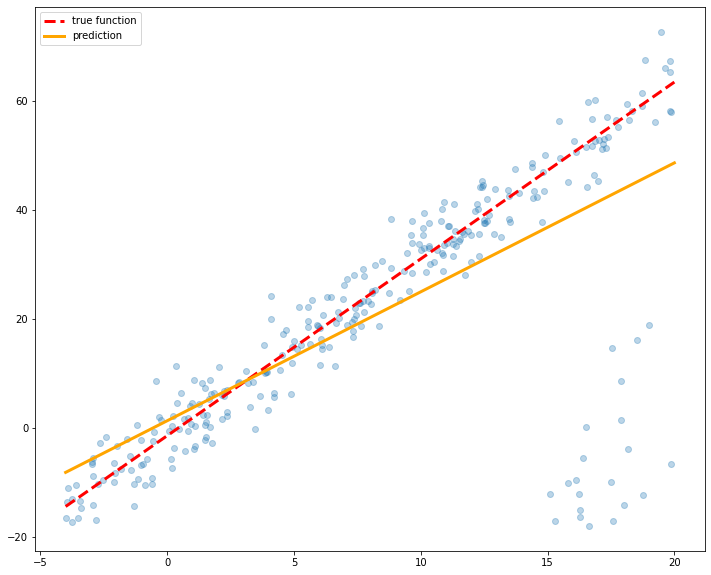

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()

model.fit(X, y)

plt.figure(figsize=(12,10))
plt.plot(x, 3.25 * x - 1.47, color = 'red', linestyle = '--', linewidth = 3, label='true function')
plt.scatter(X, y, alpha = 0.3);
plt.plot(x, model.predict(x), label='prediction', color = 'orange', linewidth = 3)
plt.legend()

print(model.coef_, model.intercept_)

##Comment
We can observe that MAE provides more accurate result. I assume that this loss function is more stable to deviations(mod(x) < x^2, hence, error is bigger)
 